<a href="https://colab.research.google.com/github/Carol-Kelly/Hamoye_Internship-Data_Science/blob/main/StageD_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Planet: Understanding the Amazon from Space challenge**

### **Data Source**
This data is sourced from the Kaggle library in the 'Competition' page via the link: https://www.kaggle.com/c/planet-understanding-the-amazon-from-space

### **Problem Statement**


*   To help the global community better understand where, how, and why deforestation happens all over the world - and ultimately how to respond.
*   To differentiate between human causes of forest loss and natural causes.



In [1]:
import sys
import os
import subprocess

from six import string_types
import math
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import time
import torch
import keras
import tensorflow as tf
from google.colab import drive
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm
from IPython.display import display
import matplotlib.image as mpimg
from skimage import io
from scipy import ndimage
get_ipython().magic('matplotlib inline')
from tensorflow import keras
from keras.optimizers import Optimizer
from PIL import Image
from keras_preprocessing.image import img_to_array, load_img
from keras.models import Sequential
from keras.layers import BatchNormalization, concatenate, Conv2D, MaxPooling2D, Conv2DTranspose, Dense, Dropout, Flatten
#from keras.applications.resnet50 import *
#from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from keras.optimizers import adam_v2

In [2]:
#!pip install numba
#from numba import cuda 
#device = cuda.get_current_device()
#device.reset()

In [3]:
#import os
#os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [4]:
#gpu_devices = tf.config.list_physical_devices('GPU')
#print(gpu_devices)
#if gpu_devices:
  #print(tf.config.experimental.get_memory_info(device)['current'])

In [5]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [6]:
!unzip '/content/drive/My Drive/archive_planet_data.zip'

Streaming output truncated to the last 5000 lines.
  inflating: test-jpg-additional/test-jpg-additional/file_5499.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_55.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_550.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_5500.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_5501.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_5502.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_5503.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_5504.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_5505.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_5506.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_5507.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_5508.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_5509.jpg  
  inflating: test-jpg-additional/test-jpg-additional/fi

In [7]:
root_path = '/content/planet/planet/'
csv_path = os.path.join(root_path + "train_classes.csv")
submission_path = os.path.join(root_path + 'sample_submission.csv')

train_imgs = os.path.join(root_path + "train-jpg")
test_imgs = os.path.join(root_path + "test-jpg")
addtional_test_imgs = os.path.join(root_path + 'test-jpg-additional/test-jpg-additional')

In [8]:
df_train = pd.read_csv(csv_path)
df_submission = pd.read_csv(submission_path)

print(f'Shape of label data: {df_train.shape}')
print(f'Shape of test data: {df_submission.shape}')

Shape of label data: (40479, 2)
Shape of test data: (61191, 2)


In [9]:
df_submission.head()

,image_name,tags
0,test_0,primary clear agriculture road water
1,test_1,primary clear agriculture road water
2,test_2,primary clear agriculture road water
3,test_3,primary clear agriculture road water
4,test_4,primary clear agriculture road water


In [10]:
df_train.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40479 entries, 0 to 40478
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_name  40479 non-null  object
 1   tags        40479 non-null  object
dtypes: object(2)
memory usage: 632.6+ KB


#### **Data Exploration**

In [12]:
import re

labels = df_train['tags']

def valueSearch(pattern):
    count = []
    num = 0
    for label in labels:
        x = re.search(pattern, label)
        if x:
            count.append(label)
    for c in count:
        num += 1
    return num

def showLabels(pattern):
    for label in labels:
        x = re.search(pattern, label)
        if x:
            print(label)

In [13]:
# check out label distribution
showLabels(r"^[\S]+$") # values with one label
showLabels(r"^[^ ]* [^ ]* [^ ]* [^ ]* [^ ]* [^ ]*$") # values with six labels
showLabels(r"^[^ ]* [^ ]* [^ ]* [^ ]* [^ ]* [^ ]* [^ ]* [^ ]* [^ ]*$") # values with nine labels 

cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy

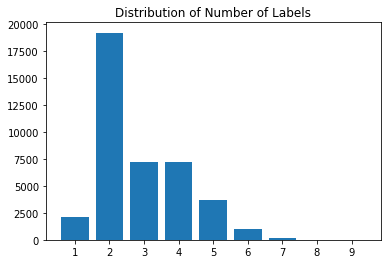

In [14]:
# visualize label distribution
patternList = [r"^[\S]+$", r"^[^ ]* [^ ]*$", r"^[^ ]* [^ ]* [^ ]*$", r"^[^ ]* [^ ]* [^ ]* [^ ]*$", r"^[^ ]* [^ ]* [^ ]* [^ ]* [^ ]*$", r"^[^ ]* [^ ]* [^ ]* [^ ]* [^ ]* [^ ]*$",
              r"^[^ ]* [^ ]* [^ ]* [^ ]* [^ ]* [^ ]* [^ ]*$", r"^[^ ]* [^ ]* [^ ]* [^ ]* [^ ]* [^ ]* [^ ]* [^ ]*$", r"^[^ ]* [^ ]* [^ ]* [^ ]* [^ ]* [^ ]* [^ ]* [^ ]* [^ ]*$", ]
    
valueList = []
chartLabels = ["1", "2", "3", "4", "5", "6", "7", "8", "9"]

for p in patternList:
    valueList.append(valueSearch(p))

fig, ax = plt.subplots()
ax.bar(chartLabels, valueList)
ax.set_xticklabels(chartLabels, rotation=360)
plt.title("Distribution of Number of Labels")
plt.show()

It can be seen from the visualization that this dataset does not contain any images that have more than nine labels; of which, most images contain two labels

In [15]:
# Build list with unique labels
label_list = []
for tag_str in df_train.tags.to_numpy():
    labels = tag_str.split(' ')
    for label in labels:
        if label not in label_list:
            label_list.append(label)

In [16]:
label_list

print('List of unique tags:\n')
print(*label_list, sep='\n')

List of unique tags:

haze
primary
agriculture
clear
water
habitation
road
cultivation
slash_burn
cloudy
partly_cloudy
conventional_mine
bare_ground
artisinal_mine
blooming
selective_logging
blow_down


In [17]:
dict_labels = dict(zip(range(0,17), label_list))
dict_labels

{0: 'haze',
 1: 'primary',
 2: 'agriculture',
 3: 'clear',
 4: 'water',
 5: 'habitation',
 6: 'road',
 7: 'cultivation',
 8: 'slash_burn',
 9: 'cloudy',
 10: 'partly_cloudy',
 11: 'conventional_mine',
 12: 'bare_ground',
 13: 'artisinal_mine',
 14: 'blooming',
 15: 'selective_logging',
 16: 'blow_down'}

In [18]:
# Add onehot features for every label
for label in label_list:
    df_train[label] = df_train['tags'].apply(lambda x: 1 if label in x.split(' ') else 0)
df_train.head()

,image_name,tags,haze,primary,agriculture,clear,water,habitation,road,cultivation,slash_burn,cloudy,partly_cloudy,conventional_mine,bare_ground,artisinal_mine,blooming,selective_logging,blow_down
0,train_0,haze primary,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,train_1,agriculture clear primary water,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,train_2,clear primary,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,train_3,clear primary,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,train_4,agriculture clear habitation primary road,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0


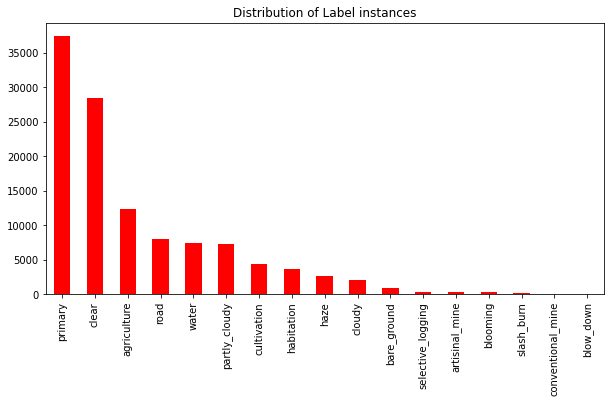

In [19]:
# visualize class distribution too
df_train[label_list].sum().sort_values(ascending=False).plot(kind='bar', title='Distribution of Label instances', color='red', figsize=(10,5)) 

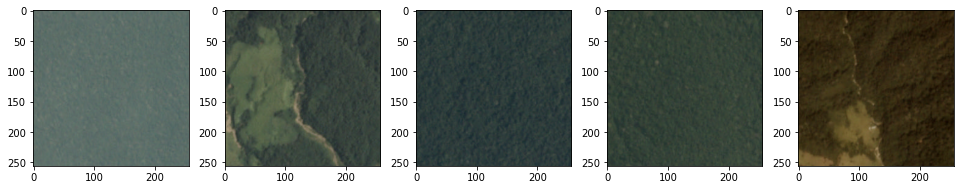

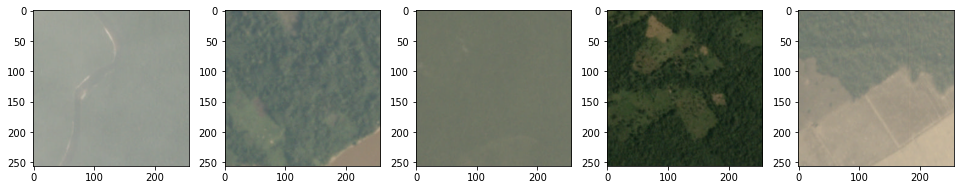

In [20]:
# visualize some images

def showImages(imgid,imgid2, imgid3, imgid4, imgid5):
    plt.figure(figsize=(20,20))
    plt.subplot(6,6,1)
    img = cv2.imread(train_imgs + "/train_" + imgid)  
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.subplot(6,6,1+1)
    img2 = cv2.imread(train_imgs + "/train_" + imgid2)  
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
    plt.imshow(img2)
    plt.subplot(6, 6,1+2)
    img3 = cv2.imread(train_imgs + "/train_" + imgid3)
    img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
    plt.imshow(img3)
    plt.subplot(6, 6, 1+3)
    img4 = cv2.imread(train_imgs + "/train_" + imgid4)
    img4 = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)
    plt.imshow(img4)
    plt.subplot(6, 6, 1+4)
    img5 = cv2.imread(train_imgs + "/train_" + imgid5)
    img5 = cv2.cvtColor(img5, cv2.COLOR_BGR2RGB)
    plt.imshow(img5)
    
showImages("0.jpg", "1.jpg", "2.jpg", "3.jpg", "4.jpg")
showImages("5.jpg", "6.jpg", "7.jpg", "8.jpg", "9.jpg")

#### **Image Preprocessing**

Improve on hazy images. This is a Single image haze removal using dark channel prior

In [21]:
class Node(object):
    def __init__(self,x,y,value):
        self.x = x
        self.y = y
        self.value = value

    def printInfo(self):
        print('%s:%s:%s' %(self.x,self.y,self.value))
        
def getMinChannel(img):

    # 输入检查
    if len(img.shape)==3 and img.shape[2]==3:
        pass
    else:
        print("bad image shape, input must be color image")
        return None
    
    return np.min(img, axis=2)

def getDarkChannel(img,blockSize = 3):

    # 输入检查
    if len(img.shape)==2:
        pass
    else:
        print("bad image shape, input image must be two demensions")
        return None

    # blockSize检查
    if blockSize % 2 == 0 or blockSize < 3:
        print('blockSize is not odd or too small')
        return None

    # 计算addSize
    A = int((blockSize-1)/2) #AddSize

    #New height and new width
    H = img.shape[0] + blockSize - 1
    W = img.shape[1] + blockSize - 1

    # 中间结果
    imgMiddle = 255 * np.ones((H,W))    

    imgMiddle[A:H-A, A:W-A] = img
    
    imgDark = np.zeros_like(img, np.uint8)    
    
    localMin = 255
    for i in range(A, H-A):
        for j in range(A, W-A):
            x = range(i-A, i+A+1)
            y = range(j-A, j+A+1)
            imgDark[i-A,j-A] = np.min(imgMiddle[x,y])                            
            
    return imgDark

def getAtomsphericLight(darkChannel,img,meanMode = False, percent = 0.001):

    size = darkChannel.shape[0]*darkChannel.shape[1]
    height = darkChannel.shape[0]
    width = darkChannel.shape[1]

    nodes = []

    # 用一个链表结构(list)存储数据
    for i in range(0,height):
        for j in range(0,width):
            oneNode = Node(i,j,darkChannel[i,j])
            nodes.append(oneNode)	

    # 排序
    nodes = sorted(nodes, key = lambda node: node.value,reverse = True)

    atomsphericLight = 0

    # 原图像像素过少时，只考虑第一个像素点
    if int(percent*size) == 0:
        for i in range(0,3):
            if img[nodes[0].x,nodes[0].y,i] > atomsphericLight:
                atomsphericLight = img[nodes[0].x,nodes[0].y,i]
        return atomsphericLight

    # 开启均值模式
    if meanMode:
        sum = 0
        for i in range(0,int(percent*size)):
            for j in range(0,3):
                sum = sum + img[nodes[i].x,nodes[i].y,j]
        atomsphericLight = int(sum/(int(percent*size)*3))
        return atomsphericLight

    # 获取暗通道前0.1%(percent)的位置的像素点在原图像中的最高亮度值
    for i in range(0,int(percent*size)):
        for j in range(0,3):
            if img[nodes[i].x,nodes[i].y,j] > atomsphericLight:
                atomsphericLight = img[nodes[i].x,nodes[i].y,j]
    return atomsphericLight

def getRecoverScene(img, omega=0.95, t0=0.1, blockSize=15, meanMode=False, percent=0.001, refine=True):

    imgGray = getMinChannel(img)
    imgDark = getDarkChannel(imgGray, blockSize = blockSize)
    atomsphericLight = getAtomsphericLight(imgDark,img,meanMode = meanMode,percent= percent)

    imgDark = np.float64(imgDark)
    transmission = 1 - omega * imgDark / atomsphericLight

    # 防止出现t小于0的情况
    # 对t限制最小值为0.1
    transmission[transmission<0.1] = 0.1     
    
    if refine:        
        normI = (img - img.min()) / (img.max() - img.min())  # normalize I
        transmission = guided_filter(normI, transmission, r=40, eps=1e-3)

    sceneRadiance = np.zeros(img.shape)
    img = np.float64(img)
    
    for i in range(3):        
        SR = (img[:,:,i] - atomsphericLight)/transmission + atomsphericLight

        # 限制透射率 在0～255                  
        SR[SR>255] = 255
        SR[SR<0] = 0                    
        sceneRadiance[:,:,i] = SR

    sceneRadiance = np.uint8(sceneRadiance)

    return sceneRadiance                        

The guided-filter helps to damp down the artefacts when the Dark-channel prior filter is applied to an image

In [22]:
"""Implementation for Guided Image Filtering
Reference:
http://research.microsoft.com/en-us/um/people/kahe/eccv10/
"""

from itertools import combinations_with_replacement
from collections import defaultdict
from numpy.linalg import inv

R, G, B = 0, 1, 2  # index for convenience

def boxfilter(I, r):
    """Fast box filter implementation.
    Parameters
    ----------
    I:  a single channel/gray image data normalized to [0.0, 1.0]
    r:  window radius
    Return
    -----------
    The filtered image data.
    """        
    M, N = I.shape
    dest = np.zeros((M, N))

    # cumulative sum over Y axis
    sumY = np.cumsum(I, axis=0)
    # difference over Y axis
    dest[:r + 1] = sumY[r: 2 * r + 1]
    dest[r + 1:M - r] = sumY[2 * r + 1:] - sumY[:M - 2 * r - 1]
    dest[-r:] = np.tile(sumY[-1], (r, 1)) - sumY[M - 2 * r - 1:M - r - 1]

    # cumulative sum over X axis
    sumX = np.cumsum(dest, axis=1)
    # difference over Y axis
    dest[:, :r + 1] = sumX[:, r:2 * r + 1]
    dest[:, r + 1:N - r] = sumX[:, 2 * r + 1:] - sumX[:, :N - 2 * r - 1]
    dest[:, -r:] = np.tile(sumX[:, -1][:, None], (1, r)) - \
        sumX[:, N - 2 * r - 1:N - r - 1]

    return dest


def guided_filter(I, p, r=40, eps=1e-3):
  """Refine a filter under the guidance of another (RGB) image.
    Parameters
    -----------
    I:   an M * N * 3 RGB image for guidance.
    p:   the M * N filter to be guided
    r:   the radius of the guidance
    eps: epsilon for the guided filter
    Return
    -----------
    The guided filter.
    """    
  M, N = p.shape
  base = boxfilter(np.ones((M, N)), r)

  # each channel of I filtered with the mean filter
  means = [boxfilter(I[:, :, i], r) / base for i in range(3)]
  # p filtered with the mean filter
  mean_p = boxfilter(p, r) / base
  # filter I with p then filter it with the mean filter
  means_IP = [boxfilter(I[:, :, i] * p, r) / base for i in range(3)]
  # covariance of (I, p) in each local patch
  covIP = [means_IP[i] - means[i] * mean_p for i in range(3)]

  # variance of I in each local patch: the matrix Sigma in ECCV10 eq.14
  var = defaultdict(dict)
  for i, j in combinations_with_replacement(range(3), 2):
        var[i][j] = boxfilter(
            I[:, :, i] * I[:, :, j], r) / base - means[i] * means[j]

  a = np.zeros((M, N, 3))
  for y, x in np.ndindex(M, N):
      #         rr, rg, rb
      # Sigma = rg, gg, gb
      #         rb, gb, bb
      Sigma = np.array([[var[R][R][y, x], var[R][G][y, x], var[R][B][y, x]],
                          [var[R][G][y, x], var[G][G][y, x], var[G][B][y, x]],
                          [var[R][B][y, x], var[G][B][y, x], var[B][B][y, x]]])
      cov = np.array([c[y, x] for c in covIP])
      a[y, x] = np.dot(cov, inv(Sigma + eps * np.eye(3)))  # eq 14

  # ECCV10 eq.15
  b = mean_p - a[:, :, R] * means[R] - \
        a[:, :, G] * means[G] - a[:, :, B] * means[B]

  # ECCV10 eq.16
  q = (boxfilter(a[:, :, R], r) * I[:, :, R] + boxfilter(a[:, :, G], r) *
         I[:, :, G] + boxfilter(a[:, :, B], r) * I[:, :, B] + boxfilter(b, r)) / base

  return q

Let's visualize some hazy images.

For each hazy image, from left to right we will plot the original image, the dark channel prior with refinement, then without. For the satellite images, refinement does not seem to have much impact, but it definitely helps to reduce artefacts in general

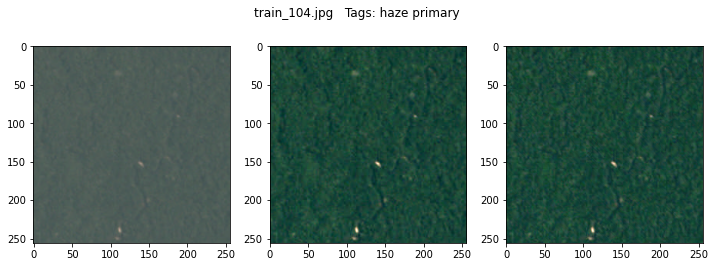

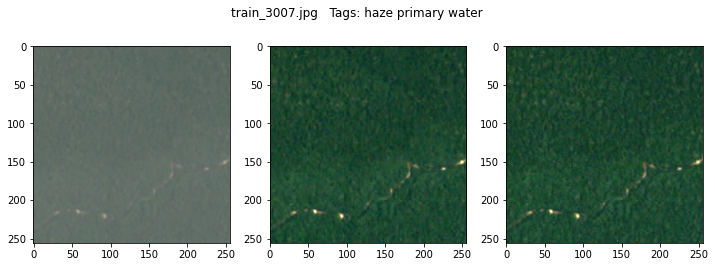

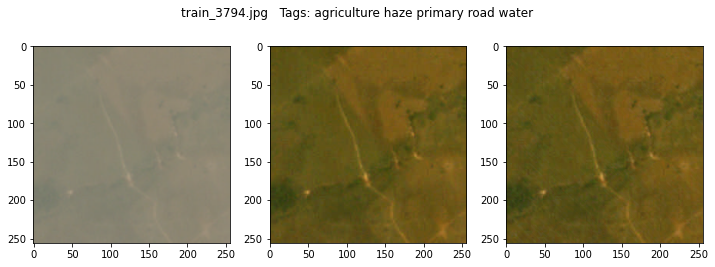

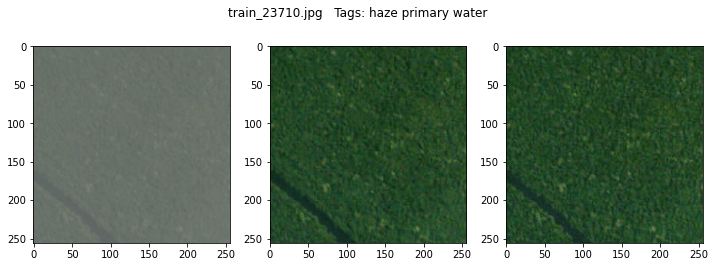

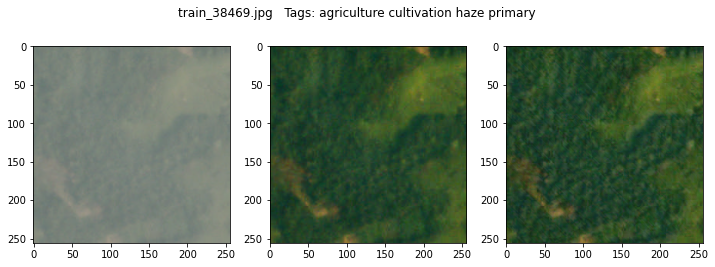

In [23]:
Hazy_img_idx = [104, 3007, 3794, 23710, 38469]

for i in Hazy_img_idx:    
     
    path = '/content/planet/planet/train-jpg/'
    filename = 'train_{}.jpg'.format(i)
    img = cv2.imread(path+filename)  #0-255    
    
    dehazed_img1 = getRecoverScene(img, refine=True)
    dehazed_img2 = getRecoverScene(img, refine=False)

    fig = plt.figure()
    fig.set_size_inches(12, 4)
    fig.suptitle(filename + '   Tags: ' + df_train['tags'][i], fontsize=12)

    plt.subplot(131)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

    plt.subplot(132)
    plt.imshow(cv2.cvtColor(dehazed_img1, cv2.COLOR_BGR2RGB))
    
    plt.subplot(133)
    plt.imshow(cv2.cvtColor(dehazed_img2, cv2.COLOR_BGR2RGB))
    
    plt.show()

### **Model Building**

In [24]:
oneHot_tagList = list(df_train.columns[2:])

In [25]:
df_train['image_name'] = df_train['image_name']+'.jpg'
df_train.head()

,image_name,tags,haze,primary,agriculture,clear,water,habitation,road,cultivation,slash_burn,cloudy,partly_cloudy,conventional_mine,bare_ground,artisinal_mine,blooming,selective_logging,blow_down
0,train_0.jpg,haze primary,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,train_1.jpg,agriculture clear primary water,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,train_2.jpg,clear primary,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,train_3.jpg,clear primary,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,train_4.jpg,agriculture clear habitation primary road,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0


In [26]:
# set up the train and validation generator
from keras_preprocessing.image import ImageDataGenerator
imageGenerator = ImageDataGenerator(rescale=1./255, validation_split=0.2)#tf.keras.preprocessing.image.

train_img = imageGenerator.flow_from_dataframe(dataframe=df_train,
                                               directory='/content/planet/planet/train-jpg/', 
                                               x_col='image_name', 
                                               y_col=oneHot_tagList,
                                               target_size=(128, 128), 
                                               class_mode='raw',
                                               seed=None,  
                                               batch_size=128, 
                                               subset='training')

val_img = imageGenerator.flow_from_dataframe(dataframe=df_train, 
                                             directory='/content/planet/planet/train-jpg/', 
                                             x_col='image_name', 
                                             y_col=oneHot_tagList,
                                             target_size=(128, 128), 
                                             class_mode='raw', 
                                             seed=None, 
                                             batch_size=5, 
                                             subset='validation')

Found 32384 validated image filenames.
Found 8095 validated image filenames.


In [27]:
from keras.layers import BatchNormalization, Conv2D, MaxPooling2D 

def prepare_model():

  #kfold_weights_path = os.path.join('', 'weights_kfold_' + '.h5')
  model = Sequential()

  model.add(BatchNormalization(input_shape=(128, 128,3)))
  
  model.add(Conv2D(64, kernel_size=(3, 3),padding='same', activation='relu'))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.2))

  model.add(Conv2D(128, kernel_size=(3, 3),padding='same', activation='relu'))
  model.add(Conv2D(128, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.2))
        
  model.add(Conv2D(256, kernel_size=(3, 3),padding='same', activation='relu'))
  model.add(Conv2D(256, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.2))
        
  model.add(Conv2D(512, kernel_size=(3, 3),padding='same', activation='relu'))
  model.add(Conv2D(512, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.5))
        
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(17, activation='sigmoid'))

  return model

In [28]:
model = prepare_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 128, 128, 3)      12        
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 128)       7

In [29]:
epochs = 20
learning_rate = 0.0001
opt  = adam_v2.Adam(learning_rate=learning_rate)
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])
callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=0, restore_best_weights=True)#validation_data=(x_test, y_test)

In [30]:
# batch_size: no of images shown to the network at once
train_steps = train_img.n // train_img.batch_size
val_steps = val_img.n // train_img.batch_size

In [31]:
model_history = model.fit(x=train_img,
                          steps_per_epoch=train_steps,
                          validation_data=val_img,
                          validation_steps=val_steps,
                          epochs=epochs,
                          callbacks=callbacks) 

Epoch 1/20
253/253 [==============================] - 124s 428ms/step - loss: 0.3143 - accuracy: 0.6143 - val_loss: 0.2463 - val_accuracy: 0.8476
Epoch 2/20
253/253 [==============================] - 110s 434ms/step - loss: 0.2428 - accuracy: 0.7246 - val_loss: 0.1909 - val_accuracy: 0.8476
Epoch 3/20
253/253 [==============================] - 109s 429ms/step - loss: 0.2015 - accuracy: 0.7176 - val_loss: 0.1519 - val_accuracy: 0.8635
Epoch 4/20
253/253 [==============================] - 109s 432ms/step - loss: 0.1818 - accuracy: 0.7112 - val_loss: 0.1430 - val_accuracy: 0.8032
Epoch 5/20
253/253 [==============================] - 109s 428ms/step - loss: 0.1670 - accuracy: 0.7082 - val_loss: 0.1209 - val_accuracy: 0.8508
Epoch 6/20
253/253 [==============================] - 109s 432ms/step - loss: 0.1582 - accuracy: 0.7167 - val_loss: 0.1291 - val_accuracy: 0.8413
Epoch 7/20
253/253 [==============================] - 109s 431ms/step - loss: 0.1513 - accuracy: 0.7109 - val_loss: 0.1231 -

In [32]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

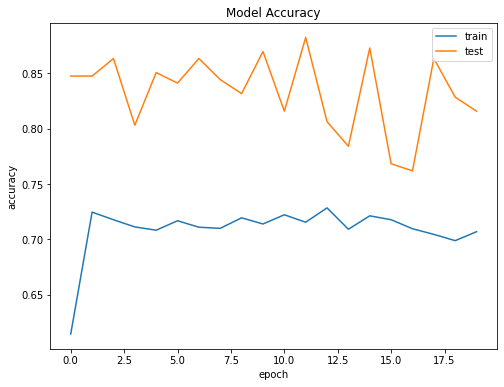

In [33]:
# plot the history
plt.figure(figsize=(8,6))
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper right')
plt.show()

In [34]:
df_test = df_submission.iloc[:40669]['image_name'].reset_index().drop('index', axis=1)

In [35]:
df_test['image_name'] = df_test['image_name']+'.jpg'
df_test.head()

,image_name
0,test_0.jpg
1,test_1.jpg
2,test_2.jpg
3,test_3.jpg
4,test_4.jpg


In [36]:
testGenerator = ImageDataGenerator(rescale=1./255)

testImages = testGenerator.flow_from_dataframe(dataframe=df_test,
                                               directory='/content/planet/planet/test-jpg/', 
                                               x_col='image_name',
                                               y_col = None,
                                               batch_size=67,
                                               shuffle=False, 
                                               class_mode=None, 
                                               target_size=(128, 128))

Found 40669 validated image filenames.


In [37]:
# step_per_epoch=length of train images/batch_size of train images
# validation_steps=length of test images/batch_size of test images
test_size = testImages.n // testImages.batch_size

In [38]:
# evaluate the model
model.evaluate(val_img, steps=test_size)

607/607 [==============================] - 9s 16ms/step - loss: 0.1079 - accuracy: 0.7964


[0.10793068259954453, 0.7963756322860718]

In [39]:
pred = model.predict(testImages, steps=test_size, verbose=1)

607/607 [==============================] - 108s 175ms/step


In [40]:
testNames = testImages.filenames 
        
result1 = pd.DataFrame(pred)
result1 = result1.apply(lambda x: ' '.join(np.array(label_list)[x >= 0.2]), axis=1)

result1_df = pd.DataFrame({'image_name': testNames, 'tags': result1})
result1_df.head()

,image_name,tags
0,test_0.jpg,primary clear
1,test_1.jpg,primary clear partly_cloudy
2,test_2.jpg,primary partly_cloudy
3,test_3.jpg,primary agriculture clear cultivation
4,test_4.jpg,primary partly_cloudy


In [41]:
df_additional = df_submission.iloc[40669:]['image_name'].reset_index().drop('index', axis=1)

In [42]:
df_additional['image_name'] = df_additional['image_name']+'.jpg'
df_additional.head()

,image_name
0,file_0.jpg
1,file_1.jpg
2,file_10.jpg
3,file_100.jpg
4,file_1000.jpg


In [45]:
additional_test = testGenerator.flow_from_dataframe(dataframe=df_additional,
                                                   directory='/content/test-jpg-additional/test-jpg-additional/', 
                                                   x_col='image_name',
                                                   y_col = None,
                                                   batch_size=62,
                                                   shuffle=False,
                                                   class_mode=None, 
                                                   target_size=(128, 128))

additionalStepSize = additional_test.n // additional_test.batch_size

Found 20522 validated image filenames.


In [46]:
# get the predicted probabilities for each class
additional_pred = model.predict(additional_test, steps=additionalStepSize, verbose=2)

331/331 - 49s - 49s/epoch - 147ms/step


In [47]:
additional_testNames = additional_test.filenames 
        
result2 = pd.DataFrame(additional_pred)
result2 = result2.apply(lambda x: ' '.join(np.array(label_list)[x >= 0.2]), axis=1)

result2_df = pd.DataFrame({'image_name': additional_testNames, 'tags': result2})
result2_df.head()

,image_name,tags
0,file_0.jpg,primary clear
1,file_1.jpg,primary agriculture cultivation partly_cloudy
2,file_10.jpg,haze primary agriculture clear water road
3,file_100.jpg,primary clear water
4,file_1000.jpg,primary clear


In [48]:
# merge both results into a single dataframe
df = pd.concat([result1_df, result2_df])
df = df.reset_index().drop('index', axis=1)
df['image_name'] = df['image_name'].str.rstrip('.jpg') 

print(df.shape)
df.head()

(61191, 2)


,image_name,tags
0,test_0,primary clear
1,test_1,primary clear partly_cloudy
2,test_2,primary partly_cloudy
3,test_3,primary agriculture clear cultivation
4,test_4,primary partly_cloudy


In [49]:
# save the results to a CSV file
df.to_csv('submission.csv', index=False)